T-Test (p) 3.33653540337e-55
Effect Size (d) 1.8904061231
(Ttest_1sampResult(statistic=21.618198942108869, pvalue=3.3365354033741254e-55), 1.8904061230959199)


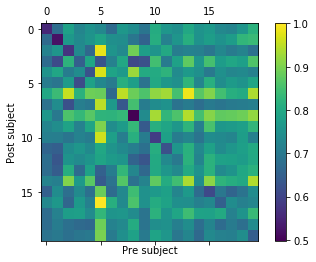

T-Test (p) 1.01457228425e-10
Effect Size (d) 0.526523078683


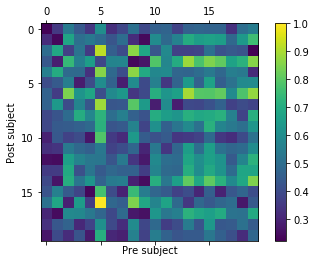

T-Test (p) 2.73072259221e-16
Effect Size (d) 0.693838944217


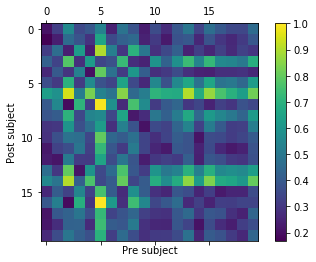

T-Test (p) 2.40410170106e-47
Effect Size (d) 1.60086103431


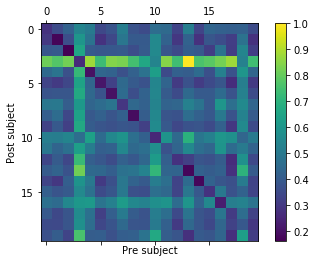

T-Test (p) 2.11941171632e-10
Effect Size (d) 0.516412207373


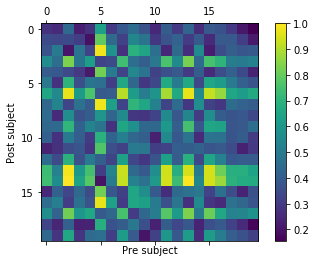

(6724,)
[  0.           5.67110559  26.13523991 ..., -24.7314285  -37.2998799    0.        ]


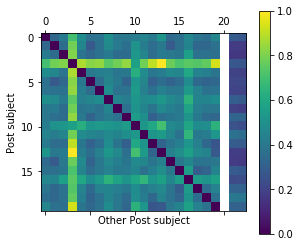

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))
F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))
F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


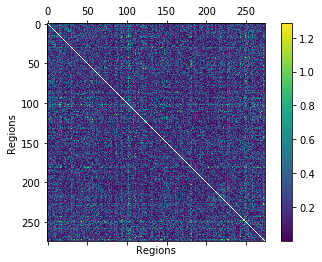

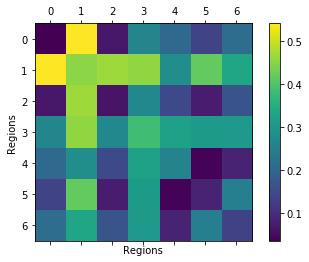

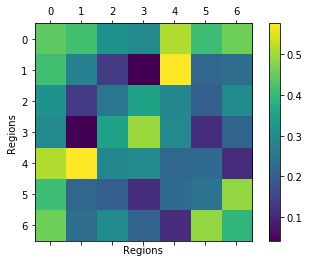

Success rate: 6 / 10


In [1]:
%run 'processing.ipynb'

# Results and Analysis

## Dimensionality reducers

In order to prevent overfitting due to the large data-size compared to number of samples, we perform dimensionality reduction on our data.

We have 5 types of reducers:

- Null-RS Reducer
  * A simple passthrough reduction on RSFC, where all information is preserved as-is
- Yeo-RS Reducer
  * Reduction based on Yeo 7-Region Parcellation on RSFC
- Hierarchical Clustering RS Reducer
  * Reduction based on Hierarchical Clustering on RSFC of 20 Training Subjects
- Null FS Reducer
  * A simple passthrough reduction on DTI Connectivity, where all information is preserved as-is
- Hierarchical Clustering FS Reducer
  * Reduction based on Hierarchical Clustering on DTI Connectivity of 20 Training Subjects

### Hierarchical Clustering

First, in order to assess whether or not there exist opportunities for further clustering the brain regions, we evaluate the dendrogram on the correlation matrix and reorganize the clusters to highlight co-firing regions in the resting state connectivity.

Data Visualization


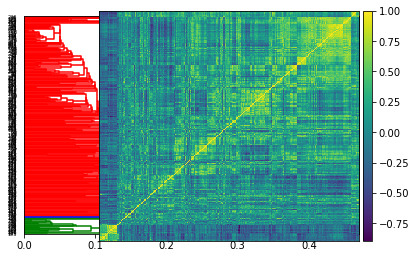

In [14]:
main.data_vis()

Based on the qualitative appearance of the data, we identify that there are clusters, of variable size, present in our data structure. We may also visualize the locations of the these clusters in spatial coordinates:

Cluster Visualization


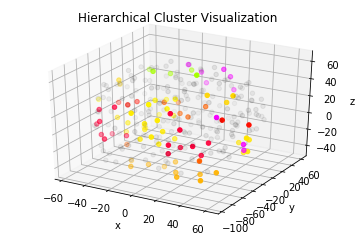

In [15]:
main.cluster_vis(yeo=False)

### Yeo Parcellation

In addition to the hierarchically clustered model, we also evaluate the efficacy of clustering based on the 7-region parcellation by Yeo et al. based on nearest-neighbor matching of the regions in Talairach space.

Cluster Visualization


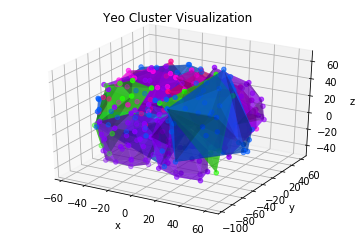

In [16]:
main.cluster_vis()

# Similarity Matrices

We evaluate how "similar" subjects are, pre- to post- intervention, using euclidean distance between the projected vectors. Each figure below shows the normalized distance between each post-intervention scan on the vertical axis and each pre-intervention scan on the horizontal axis. Diagonal entries represent the similiarity of a given subject's post-intervention scan to their own pre-intervention scan.

Overall, we see clear diagonal trends in many of the matrices, which indicate evidence of autocorrelation. Note that the matrices themselves represent euclidean distance of vectorized representations of connectivity, so *lower* values represent *higher* similarities.

### Null Flattening reduction

T-Test (p) 3.33653540337e-55
Effect Size (d) 1.8904061231


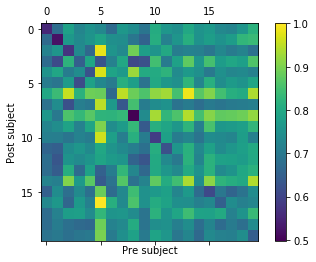

In [23]:
plotSimilarityMatrix(subjects, nullRSreducer); # RSFC data
significance_test(subjects, nullRSreducer);

T-Test (p) 2.40410170106e-47
Effect Size (d) 1.60086103431


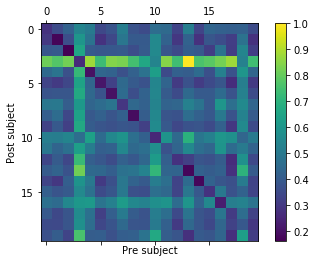

In [24]:
plotSimilarityMatrix(subjects, nullFSreducer); # Diffusion Tensor data
significance_test(subjects, nullFSreducer);

Visually, both the RSFC data and Diffusion tensor show dark primary diagonals, indicating that there is a consistency between each scan of the same subject.

### Correlation Clustering reduction

T-Test (p) 1.01457228425e-10
Effect Size (d) 0.526523078683


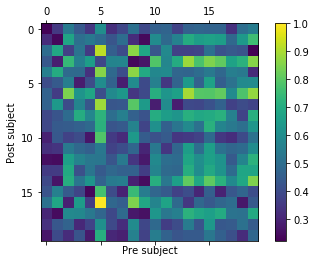

In [25]:
plotSimilarityMatrix(subjects, clusteringRSreducer); # RSFC data
significance_test(subjects, clusteringRSreducer);

T-Test (p) 2.11941171632e-10
Effect Size (d) 0.516412207373


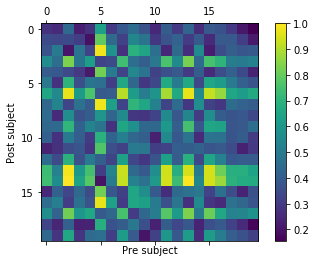

In [26]:
plotSimilarityMatrix(subjects, clusteringFSreducer); # Diffusion Tensor data
significance_test(subjects, clusteringFSreducer);

The correlation clustering process decreases the amount of apparent autocorrelation in the data, indicating that it filters out some of the components of the scan data that contribute to a subject's "identity", instead amplifying differences. Note that, even though the effect is no longer visually obvious, T-tests still indicate $(p<0.05)$ that the distance to the subject's own pre-intervention scan is smaller than would be expected by random chance.

### Yeo Clustering reduction

T-Test (p) 2.73072259221e-16
Effect Size (d) 0.693838944217


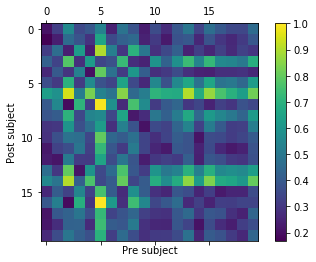

In [28]:
plotSimilarityMatrix(subjects, yeoRSreducer); # RSFC data
significance_test(subjects, yeoRSreducer);

Yeo clusters produce a similar, if slightly less dramatic, effect as Correlation Clustering.

# Directionality modelling

In our directionality analysis, we quantify observable intra- and inter-subject trends in order to answer our two questions: how much of subject identity, as explained by RSFC, is retained and whether or not subjects demonstrate predictable change in brain regions connectivity.

## Regional Directionality

In order to observe whether or not there exist consistent trends in how regional connectivity change pre- to post-training, we plot the effect size of pre- and post- Resting-State Functional Connectivity data, as well as evaluate ANOVA on the distribution of change in regional connectivity on the respective reduction methods:

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


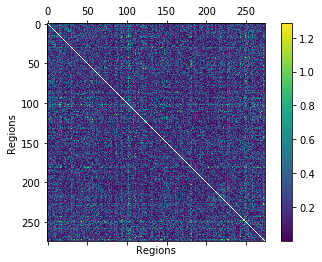

In [36]:
plotRegionalChange(subjects, nullRSreducer);

F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))


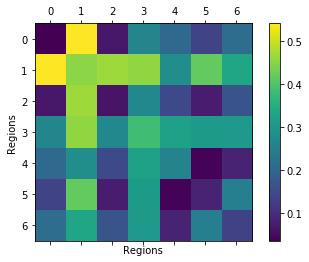

In [34]:
plotRegionalChange(subjects, yeoRSreducer);

F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


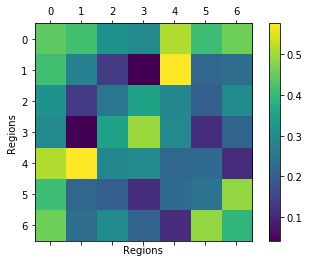

In [35]:
plotRegionalChange(subjects, clusteringRSreducer);

The resultant plot validates our motivation behind dimensionality reduction: that with 77284-dimensional data and 20 samples, we are bound to observe a large directionality in at least one of the datasets. The small p-value from our ANOVA test, with the null hypothesis that the regional changes are drawn from the same distribution, validates this result.

On the other hand, the effect-sizes, of medium range(~0.5) obtained from the clustering analysis is relatively more credible, and demonstrates consistent trends in specific regional connectivities.

## SVM-based Directionality Prediction

Whereas we have observed large p-values in the previous ANOVA test, we seek to validate the results on basis of whether or not we can classify pre-to-post directionality data with an SVM classifier.

In [13]:
res, classifier = trainSvm(subjects, clusteringRSreducer)
res, classifier = trainSvm(subjects, yeoRSreducer)
res, classifier = trainSvm(subjects, nullRSreducer)

Success rate: 6 / 10
Success rate: 0 / 10
Success rate: 4 / 10


Here, we observe that, interestingly, the SVM based on the Yeo-7 Parcellated clusters consistently perform worse than random.